In [1]:
import pandas as pd
import numpy as np

In [2]:
matches=pd.read_csv('IPL_Matches_2008_2022.csv')
balls=pd.read_csv('IPL_Ball_by_Ball_2008_2022.csv')
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4]:
balls['batter'].unique()

array(['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal',
       'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy',
       'WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller',
       'V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror',
       'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel',
       'JR Hazlewood', 'Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda',
       'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'PK Garg',
       'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran',
       'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar',
       'Umran Malik', 'JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',
       'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad',
       'PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant', 'SN Khan',
       'R Powell', 'AR Patel', 'SN Thakur', 'Kuldeep Yadav',
       'Ishan Kishan', 'RG Sharma', 'D Brevis', 'Tilak Varma', 'TH David',
       'Ramandeep Singh', 'DR Sams', 'RD Gaikwa

In [5]:
runs_per_batter_per_match=balls.groupby(['batter','ID'])['batsman_run'].sum()
runs_per_batter_per_match

batter          ID     
A Ashish Reddy  548346     10
                548352      3
                548359      8
                548373     10
                548376      4
                           ..
Z Khan          980903      4
                980993      2
                1082595     1
                1082635     2
                1082646     1
Name: batsman_run, Length: 14229, dtype: int64

In [6]:
wickets_per_bowler=balls.groupby(['bowler'])['isWicketDelivery'].sum()
wickets_per_bowler

bowler
A Ashish Reddy     19
A Badoni            2
A Chandila         11
A Choudhary         5
A Dananjaya         0
                 ... 
YK Pathan          46
YS Chahal         172
Yash Dayal         13
Yuvraj Singh       39
Z Khan            119
Name: isWicketDelivery, Length: 472, dtype: int64

In [7]:
bowler_extras=balls.groupby(['bowler'])['extras_run'].sum()
bowler_extras

bowler
A Ashish Reddy     14
A Badoni            1
A Chandila          3
A Choudhary         7
A Dananjaya         1
                 ... 
YK Pathan          71
YS Chahal         175
Yash Dayal         13
Yuvraj Singh       27
Z Khan            169
Name: extras_run, Length: 472, dtype: int64

In [8]:
final = pd.merge(matches, balls, on='ID', how='outer')
final

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
1,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
2,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,wides,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
3,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
4,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
225950,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Gujarat Titans
225951,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Gujarat Titans
225952,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,NaN,2,0,2,0,0,NaN,NaN,NaN,Gujarat Titans


In [9]:
index1 = final[final['Team2'] == final['BattingTeam']]['Team1'].index
index2 = final[final['Team1'] == final['BattingTeam']]['Team2'].index
final.loc[index1, 'BowlingTeam'] = final.loc[index1, 'Team1']
final.loc[index2, 'BowlingTeam'] = final.loc[index2, 'Team2']
final.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [10]:
# Dictionary mapping old team names to new team names
team_name_replacements = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiant': 'Pune Warriors',
    'Rising Pune Supergiants': 'Pune Warriors',
    'Pune Warriorss': 'Pune Warriors',
    'Gujarat Lions': 'Gujarat Titans'
}

# Replace team names in Team1, Team2, and WinningTeam columns
for old_name, new_name in team_name_replacements.items():
    final['Team1'] = final['Team1'].str.replace(old_name, new_name)
    final['Team2'] = final['Team2'].str.replace(old_name, new_name)
    final['WinningTeam'] = final['WinningTeam'].str.replace(old_name, new_name)
    final['BattingTeam'] = final['BattingTeam'].str.replace(old_name, new_name)
    final['BowlingTeam'] = final['BowlingTeam'].str.replace(old_name, new_name)

In [11]:
teams2023 = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [12]:
# Filter the final DataFrame based on the teams in teams2023
final = final[final['Team1'].isin(teams2023)]
final = final[final['Team2'].isin(teams2023)]
final = final[final['WinningTeam'].isin(teams2023)]
final = final[final['BattingTeam'].isin(teams2023)]
final = final[final['BowlingTeam'].isin(teams2023)]

In [13]:
final['BattingTeam'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Punjab Kings', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [14]:
final['BowlingTeam'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Punjab Kings', 'Chennai Super Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [15]:
final.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,1,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,0,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [16]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204772 entries, 0 to 225953
Data columns (total 37 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 204772 non-null  int64  
 1   City               192375 non-null  object 
 2   Date               204772 non-null  object 
 3   Season             204772 non-null  object 
 4   MatchNumber        204772 non-null  object 
 5   Team1              204772 non-null  object 
 6   Team2              204772 non-null  object 
 7   Venue              204772 non-null  object 
 8   TossWinner         204772 non-null  object 
 9   TossDecision       204772 non-null  object 
 10  SuperOver          204772 non-null  object 
 11  WinningTeam        204772 non-null  object 
 12  WonBy              204772 non-null  object 
 13  Margin             201138 non-null  float64
 14  method             2481 non-null    object 
 15  Player_of_Match    204772 non-null  object 
 16  Team1Pl

In [17]:
final.isna().sum()

ID                        0
City                  12397
Date                      0
Season                    0
MatchNumber               0
Team1                     0
Team2                     0
Venue                     0
TossWinner                0
TossDecision              0
SuperOver                 0
WinningTeam               0
WonBy                     0
Margin                 3634
method               202291
Player_of_Match           0
Team1Players              0
Team2Players              0
Umpire1                   0
Umpire2                   0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           193781
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           194670
kind                 194670
fielders_involved    197529
BattingTeam         

In [18]:
# Step 1: Identify non-numeric values in 'MatchNumber'
# First, check which values are not numeric
non_numeric_values = final[~final['MatchNumber'].str.isnumeric()]['MatchNumber'].unique()
print("Non-numeric values:", non_numeric_values)

# Step 2: Remove rows where 'MatchNumber' is non-numeric
# Alternatively, replace these non-numeric values with NaN
final = final[final['MatchNumber'].str.isnumeric()]  # Keep only numeric rows

# Step 3: Now convert 'MatchNumber' to integer
final['MatchNumber'] = final['MatchNumber'].astype(int)

# Step 4: Verify the change
print(final['MatchNumber'].dtype)  # It should now be int64

Non-numeric values: ['Semi Final' 'Final' '3rd Place Play-Off' 'Qualifier 1'
 'Elimination Final' 'Qualifier 2' 'Eliminator' 'Qualifier']
int32


In [19]:
final['ballplayed'] = 1
final['4s'] = np.where(final['batsman_run'] == 4, 1, 0)
final['6s'] = np.where(final['batsman_run'] == 6, 1, 0)

In [20]:
final.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,ballplayed,4s,6s
0,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
1,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
2,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
3,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0
4,335982,Bangalore,2008-04-18,2007/08,1,Royal Challengers Bangalore,Kolkata Knight Riders,M Chinnaswamy Stadium,Royal Challengers Bangalore,field,...,0,0,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0


In [21]:
match_count=final.groupby(['batter','BowlingTeam','City','TossDecision','MatchNumber'])[['total_run']].sum().reset_index()
match_count.head(40)

,batter,BowlingTeam,City,TossDecision,MatchNumber,total_run
0,A Ashish Reddy,Chennai Super Kings,Chennai,bat,34,36
1,A Ashish Reddy,Chennai Super Kings,Chennai,bat,46,3
2,A Ashish Reddy,Chennai Super Kings,Hyderabad,field,34,6
3,A Ashish Reddy,Delhi Capitals,Delhi,bat,14,16
4,A Ashish Reddy,Delhi Capitals,Hyderabad,bat,48,6
5,A Ashish Reddy,Delhi Capitals,Visakhapatnam,bat,13,15
6,A Ashish Reddy,Kolkata Knight Riders,Hyderabad,bat,8,14
7,A Ashish Reddy,Kolkata Knight Riders,Kolkata,bat,17,4
8,A Ashish Reddy,Mumbai Indians,Hyderabad,bat,56,17
9,A Ashish Reddy,Mumbai Indians,Mumbai,field,40,10


In [22]:
temp=match_count.groupby(['batter','BowlingTeam','City','TossDecision'])[['MatchNumber']].count().reset_index()

In [23]:
batsman=final.groupby(['batter','BowlingTeam','City','TossDecision'])[['batsman_run','ballplayed','4s','6s']].sum().reset_index()
batsman.head()

,batter,BowlingTeam,City,TossDecision,batsman_run,ballplayed,4s,6s
0,A Ashish Reddy,Chennai Super Kings,Chennai,bat,39,19,2,3
1,A Ashish Reddy,Chennai Super Kings,Hyderabad,field,6,6,1,0
2,A Ashish Reddy,Delhi Capitals,Delhi,bat,16,9,2,0
3,A Ashish Reddy,Delhi Capitals,Hyderabad,bat,5,7,1,0
4,A Ashish Reddy,Delhi Capitals,Visakhapatnam,bat,15,8,1,1


In [24]:
batsman['Matches']=temp['MatchNumber']
batsman.head()

,batter,BowlingTeam,City,TossDecision,batsman_run,ballplayed,4s,6s,Matches
0,A Ashish Reddy,Chennai Super Kings,Chennai,bat,39,19,2,3,2
1,A Ashish Reddy,Chennai Super Kings,Hyderabad,field,6,6,1,0,1
2,A Ashish Reddy,Delhi Capitals,Delhi,bat,16,9,2,0,1
3,A Ashish Reddy,Delhi Capitals,Hyderabad,bat,5,7,1,0,1
4,A Ashish Reddy,Delhi Capitals,Visakhapatnam,bat,15,8,1,1,1


In [25]:
batsman['StrikeRate']=((batsman['batsman_run']/batsman['ballplayed'])*100).round(2)
batsman.head()

,batter,BowlingTeam,City,TossDecision,batsman_run,ballplayed,4s,6s,Matches,StrikeRate
0,A Ashish Reddy,Chennai Super Kings,Chennai,bat,39,19,2,3,2,205.26
1,A Ashish Reddy,Chennai Super Kings,Hyderabad,field,6,6,1,0,1,100.00
2,A Ashish Reddy,Delhi Capitals,Delhi,bat,16,9,2,0,1,177.78
3,A Ashish Reddy,Delhi Capitals,Hyderabad,bat,5,7,1,0,1,71.43
4,A Ashish Reddy,Delhi Capitals,Visakhapatnam,bat,15,8,1,1,1,187.50


In [26]:
batsman=batsman.drop('ballplayed',axis=1)
batsman.head()

,batter,BowlingTeam,City,TossDecision,batsman_run,4s,6s,Matches,StrikeRate
0,A Ashish Reddy,Chennai Super Kings,Chennai,bat,39,2,3,2,205.26
1,A Ashish Reddy,Chennai Super Kings,Hyderabad,field,6,1,0,1,100.00
2,A Ashish Reddy,Delhi Capitals,Delhi,bat,16,2,0,1,177.78
3,A Ashish Reddy,Delhi Capitals,Hyderabad,bat,5,1,0,1,71.43
4,A Ashish Reddy,Delhi Capitals,Visakhapatnam,bat,15,1,1,1,187.50


In [27]:
batsman = batsman.rename(columns={'batsman_run': 'Runs'})
batsman.head()

,batter,BowlingTeam,City,TossDecision,Runs,4s,6s,Matches,StrikeRate
0,A Ashish Reddy,Chennai Super Kings,Chennai,bat,39,2,3,2,205.26
1,A Ashish Reddy,Chennai Super Kings,Hyderabad,field,6,1,0,1,100.00
2,A Ashish Reddy,Delhi Capitals,Delhi,bat,16,2,0,1,177.78
3,A Ashish Reddy,Delhi Capitals,Hyderabad,bat,5,1,0,1,71.43
4,A Ashish Reddy,Delhi Capitals,Visakhapatnam,bat,15,1,1,1,187.50


In [28]:
runs_per_batter = batsman.groupby('batter')['Runs'].sum()

In [29]:
# Step 1: Aggregate total runs by batter
total_runs_per_batter = batsman.groupby('batter')['Runs'].sum()

# Step 2: Filter out batters with less than 500 runs
batters_above_500 = total_runs_per_batter[total_runs_per_batter >= 500].index

# Step 3: Filter the original DataFrame to keep only these batters
batsman_new = batsman[batsman['batter'].isin(batters_above_500)]

In [30]:
batsman_new.head()

,batter,BowlingTeam,City,TossDecision,Runs,4s,6s,Matches,StrikeRate
126,A Symonds,Chennai Super Kings,Chennai,bat,50,3,3,1,108.70
127,A Symonds,Chennai Super Kings,Mumbai,field,31,1,2,1,106.90
128,A Symonds,Chennai Super Kings,Nagpur,bat,27,1,2,1,108.00
129,A Symonds,Delhi Capitals,Cuttack,bat,35,3,2,1,145.83
130,A Symonds,Delhi Capitals,Delhi,bat,54,3,5,1,180.00


In [31]:
batsman_new.isna().sum()

batter          0
BowlingTeam     0
City            0
TossDecision    0
Runs            0
4s              0
6s              0
Matches         0
StrikeRate      0
dtype: int64

In [32]:
batsman_new['batter'].unique()

array(['A Symonds', 'AB de Villiers', 'AC Gilchrist', 'AD Russell',
       'AJ Finch', 'AK Markram', 'AM Rahane', 'AR Patel', 'AT Rayudu',
       'Abhishek Sharma', 'BB McCullum', 'BJ Hodge', 'CA Lynn',
       'CH Gayle', 'CH Morris', 'CL White', 'D Padikkal', 'DA Miller',
       'DA Warner', 'DJ Bravo', 'DJ Hooda', 'DJ Hussey',
       'DPMD Jayawardene', 'DR Smith', 'E Lewis', 'EJG Morgan',
       'F du Plessis', 'G Gambhir', 'GC Smith', 'GJ Bailey', 'GJ Maxwell',
       'HH Gibbs', 'HH Pandya', 'HM Amla', 'Harbhajan Singh', 'IK Pathan',
       'Ishan Kishan', 'JA Morkel', 'JC Buttler', 'JH Kallis',
       'JM Bairstow', 'JP Duminy', 'KA Pollard', 'KC Sangakkara',
       'KD Karthik', 'KH Pandya', 'KK Nair', 'KL Rahul', 'KM Jadhav',
       'KP Pietersen', 'KS Williamson', 'LMP Simmons', 'LRPL Taylor',
       'LS Livingstone', 'M Vijay', 'M Vohra', 'MA Agarwal',
       'MC Henriques', 'MEK Hussey', 'MK Pandey', 'MK Tiwary',
       'ML Hayden', 'MM Ali', 'MP Stoinis', 'MS Bisla', 'MS Dh

In [33]:
retired_players = [
    'A Symonds', 'AB de Villiers', 'AC Gilchrist', 'AJ Finch', 'AM Nayar', 
    'BB McCullum', 'BJ Hodge', 'CA Lynn', 'CH Gayle', 'CH Morris', 'CL White', 
    'DJ Bravo', 'DJ Hussey', 'DPMD Jayawardene', 'DR Smith', 'E Lewis', 
    'EJG Morgan', 'G Gambhir', 'GC Smith', 'GJ Bailey', 'HH Gibbs', 'HM Amla', 
    'Harbhajan Singh', 'IK Pathan', 'JA Morkel', 'JH Kallis', 'JP Duminy', 
    'KC Sangakkara', 'KD Karthik', 'KK Nair', 'KP Pietersen', 'LMP Simmons', 
    'LRPL Taylor', 'M Vijay', 'MC Henriques', 'MEK Hussey', 'MK Tiwary', 'ML Hayden', 
    'MM Ali', 'MS Bisla', 'Mandeep Singh', 'NV Ojha', 'PA Patel', 'PP Chawla', 
    'PP Shaw', 'R Dravid', 'RS Bopara', 'RV Uthappa', 'S Badrinath', 'SC Ganguly', 
    'SE Marsh', 'SK Raina', 'SR Tendulkar', 'SR Watson', 'SS Tiwary', 'ST Jayasuriya', 
    'STR Binny', 'TL Suman', 'TM Dilshan', 'V Sehwag', 'Y Venugopal Rao', 'YK Pathan'
]

In [34]:
batsman_final = batsman_new[~batsman_new['batter'].isin(retired_players)]
batsman_final.head()

,batter,BowlingTeam,City,TossDecision,Runs,4s,6s,Matches,StrikeRate
393,AD Russell,Chennai Super Kings,Abu Dhabi,bat,22,2,1,2,115.79
394,AD Russell,Chennai Super Kings,Chennai,field,142,6,14,3,165.12
395,AD Russell,Chennai Super Kings,Kolkata,field,65,5,5,2,175.68
396,AD Russell,Chennai Super Kings,Mumbai,field,54,3,6,1,225.00
397,AD Russell,Chennai Super Kings,Ranchi,bat,1,0,0,1,20.00


In [35]:
batsman_final['batter'].unique()

array(['AD Russell', 'AK Markram', 'AM Rahane', 'AR Patel', 'AT Rayudu',
       'Abhishek Sharma', 'D Padikkal', 'DA Miller', 'DA Warner',
       'DJ Hooda', 'F du Plessis', 'GJ Maxwell', 'HH Pandya',
       'Ishan Kishan', 'JC Buttler', 'JM Bairstow', 'KA Pollard',
       'KH Pandya', 'KL Rahul', 'KM Jadhav', 'KS Williamson',
       'LS Livingstone', 'M Vohra', 'MA Agarwal', 'MK Pandey',
       'MP Stoinis', 'MS Dhoni', 'N Pooran', 'N Rana', 'Q de Kock',
       'R Ashwin', 'R Tewatia', 'RA Jadeja', 'RA Tripathi', 'RD Gaikwad',
       'RG Sharma', 'RR Pant', 'S Dhawan', 'S Dube', 'SA Yadav',
       'SO Hetmyer', 'SP Narine', 'SPD Smith', 'SS Iyer', 'SV Samson',
       'Shakib Al Hasan', 'Shubman Gill', 'V Kohli', 'V Shankar',
       'WP Saha', 'Yuvraj Singh'], dtype=object)

In [36]:
batsman_final['City'].unique()

array(['Abu Dhabi', 'Chennai', 'Kolkata', 'Mumbai', 'Ranchi', 'Ahmedabad',
       'Delhi', 'Navi Mumbai', 'Pune', 'Chandigarh', 'Indore',
       'Bangalore', 'Bengaluru', 'Hyderabad', 'Visakhapatnam', 'Dubai',
       'Sharjah', 'Jaipur', 'Centurion', 'East London', 'Durban',
       'Johannesburg', 'Port Elizabeth', 'Rajkot', 'Cuttack',
       'Dharamsala', 'Raipur', 'Kanpur', 'Nagpur', 'Cape Town',
       'Kimberley', 'Bloemfontein'], dtype=object)

In [37]:
batsman_final.loc[batsman_final['City'] == 'Banglore', 'City'] = 'Bengaluru'

In [38]:
indian_cities = [
    'Chennai', 'Kolkata', 'Mumbai','Ahmedabad','Delhi',
    'Chandigarh','Jaipur','Bengaluru','Hyderabad','Dharamsala',
    'Kanpur'
]

batsman_final = batsman_final[batsman_final['City'].isin(indian_cities)]

In [39]:
batsman_final.head()

,batter,BowlingTeam,City,TossDecision,Runs,4s,6s,Matches,StrikeRate
394,AD Russell,Chennai Super Kings,Chennai,field,142,6,14,3,165.12
395,AD Russell,Chennai Super Kings,Kolkata,field,65,5,5,2,175.68
396,AD Russell,Chennai Super Kings,Mumbai,field,54,3,6,1,225.00
398,AD Russell,Delhi Capitals,Ahmedabad,field,45,2,4,1,166.67
399,AD Russell,Delhi Capitals,Delhi,field,127,10,11,2,162.82


In [40]:
batsman_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1584 entries, 394 to 8593
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   batter        1584 non-null   object 
 1   BowlingTeam   1584 non-null   object 
 2   City          1584 non-null   object 
 3   TossDecision  1584 non-null   object 
 4   Runs          1584 non-null   int64  
 5   4s            1584 non-null   int32  
 6   6s            1584 non-null   int32  
 7   Matches       1584 non-null   int64  
 8   StrikeRate    1584 non-null   float64
dtypes: float64(1), int32(2), int64(2), object(4)
memory usage: 111.4+ KB


In [41]:
batsman_final['AvgRun']=batsman_final['Runs']/batsman['Matches']
batsman_final['Avg4s']=batsman_final['4s']/batsman['Matches']
batsman_final['Avg6s']=batsman_final['6s']/batsman['Matches']

batsman_final['AvgRun'] = batsman_final['AvgRun'].fillna(0).astype(int)
batsman_final['Avg4s'] = batsman_final['Avg4s'].fillna(0).astype(int)
batsman_final['Avg6s'] = batsman_final['Avg6s'].fillna(0).astype(int)


batsman_final.head()

,batter,BowlingTeam,City,TossDecision,Runs,4s,6s,Matches,StrikeRate,AvgRun,Avg4s,Avg6s
394,AD Russell,Chennai Super Kings,Chennai,field,142,6,14,3,165.12,47,2,4
395,AD Russell,Chennai Super Kings,Kolkata,field,65,5,5,2,175.68,32,2,2
396,AD Russell,Chennai Super Kings,Mumbai,field,54,3,6,1,225.00,54,3,6
398,AD Russell,Delhi Capitals,Ahmedabad,field,45,2,4,1,166.67,45,2,4
399,AD Russell,Delhi Capitals,Delhi,field,127,10,11,2,162.82,63,5,5


In [42]:
batsman_final=batsman_final.drop(['Runs','4s','6s','Matches'],axis=1)
batsman_final.head()

,batter,BowlingTeam,City,TossDecision,StrikeRate,AvgRun,Avg4s,Avg6s
394,AD Russell,Chennai Super Kings,Chennai,field,165.12,47,2,4
395,AD Russell,Chennai Super Kings,Kolkata,field,175.68,32,2,2
396,AD Russell,Chennai Super Kings,Mumbai,field,225.00,54,3,6
398,AD Russell,Delhi Capitals,Ahmedabad,field,166.67,45,2,4
399,AD Russell,Delhi Capitals,Delhi,field,162.82,63,5,5


In [43]:
weights = {
    'Runs': 0.4,  # 40% weight to Runs
    'StrikeRate': 0.3,  # 30% weight to StrikeRate
    '4s': 0.1,  # 20% weight to 4s
    '6s': 0.2  # 10% weight to 6s
}

def calculate_impact_score(row):
    impact = (weights['Runs'] * row['AvgRun'] +
              weights['StrikeRate'] * row['StrikeRate'] +
              weights['4s'] * row['Avg4s'] +
              weights['6s'] * row['Avg6s'])
    return impact

batsman_final['ImpactScore'] = batsman_final.apply(calculate_impact_score, axis=1)

In [44]:
batsman_final.head()

,batter,BowlingTeam,City,TossDecision,StrikeRate,AvgRun,Avg4s,Avg6s,ImpactScore
394,AD Russell,Chennai Super Kings,Chennai,field,165.12,47,2,4,69.336
395,AD Russell,Chennai Super Kings,Kolkata,field,175.68,32,2,2,66.104
396,AD Russell,Chennai Super Kings,Mumbai,field,225.00,54,3,6,90.600
398,AD Russell,Delhi Capitals,Ahmedabad,field,166.67,45,2,4,69.001
399,AD Russell,Delhi Capitals,Delhi,field,162.82,63,5,5,75.546


In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor

# Features and target columns
features = ['batter', 'BowlingTeam', 'City', 'TossDecision']
target_columns = ['StrikeRate', 'AvgRun', 'Avg4s', 'Avg6s', 'ImpactScore']

# Splitting the dataset into features and targets
X = batsman_final[features]
y = batsman_final[target_columns]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a ColumnTransformer to apply one-hot encoding on categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['batter', 'BowlingTeam', 'City', 'TossDecision'])  # One-hot encode categorical features
    ])

# Create a pipeline that first applies preprocessing and then applies the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', MultiOutputRegressor(RandomForestRegressor()))
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Optionally: You can evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 455.50532317071577


In [122]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 10.330433458866077


In [132]:
from sklearn.metrics import r2_score

# Calculate R² scores for each target
r2_scores = []
for i, target in enumerate(target_columns):
    r2 = r2_score(y_test.iloc[:, i], predictions[:, i])
    r2_scores.append(r2)
    print(f"{target} R² Score (Accuracy): {r2:.2f}")

StrikeRate R² Score (Accuracy): -0.14
AvgRun R² Score (Accuracy): -0.07
Avg4s R² Score (Accuracy): -0.03
Avg6s R² Score (Accuracy): -0.12
ImpactScore R² Score (Accuracy): -0.08


array([[<Axes: title={'center': 'StrikeRate'}>,
        <Axes: title={'center': 'AvgRun'}>],
       [<Axes: title={'center': 'Avg4s'}>,
        <Axes: title={'center': 'Avg6s'}>],
       [<Axes: title={'center': 'ImpactScore'}>, <Axes: >]], dtype=object)

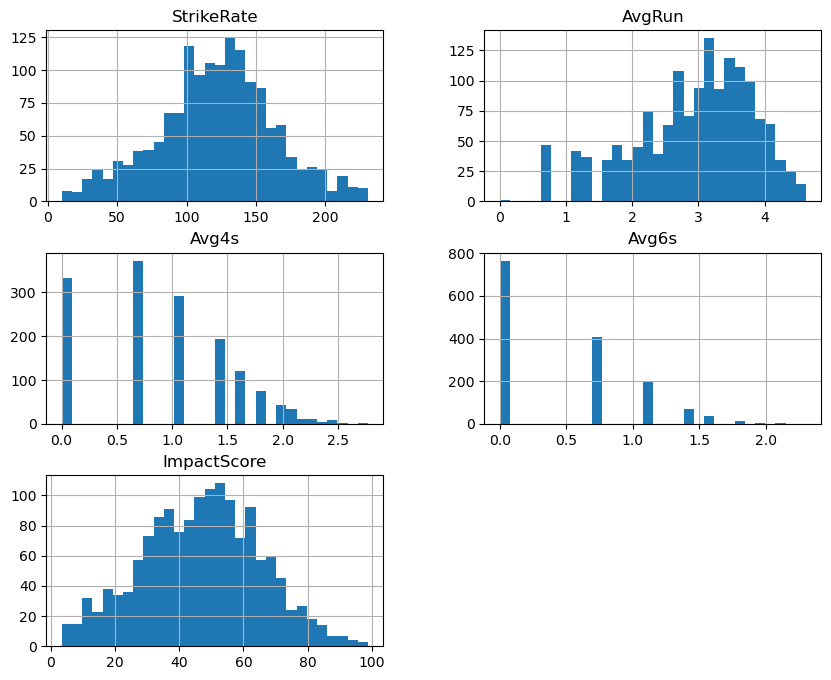

In [126]:
batsman_final[target_columns].describe()
batsman_final[target_columns].hist(bins=30, figsize=(10, 8))

In [110]:
import numpy as np

# Log transformation for skewed features
batsman_final['AvgRun'] = np.log1p(batsman_final['AvgRun'])
batsman_final['Avg4s'] = np.log1p(batsman_final['Avg4s'])
batsman_final['Avg6s'] = np.log1p(batsman_final['Avg6s'])

# Outlier removal using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

batsman_final = remove_outliers(batsman_final, 'StrikeRate')
batsman_final = remove_outliers(batsman_final, 'ImpactScore')

In [128]:
l = [['JC Buttler', 'Chennai Super Kings', 'Jaipur','field']]
columns = ['batter', 'BowlingTeam', 'City', 'TossDecision']

team2023 = pd.DataFrame(l,columns=columns)

In [130]:
pipeline.predict(team2023)

array([[192.8457    ,   3.28861311,   1.60736988,   0.76744424,
         71.37468   ]])

In [49]:
# import pickle

# # Save the model (the pipeline in this case)
# with open('batsmanmodel.pkl', 'wb') as file:
#     pickle.dump(pipeline, file)